## Importanto as Biblioteca

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

## Obtendo e tratando os dados

Para colar os dados do indice Bovespa e do dolar pela biblioteca yfinance usamos respectivamente os codigos ^BVSP e USDBRL

In [3]:
tickers = "^BVSP USDBRL=X"
carteira = yf.download(tickers, start="2007-01-01")["Close"]

[*********************100%***********************]  2 of 2 completed


In [4]:
carteira

,USDBRL=X,^BVSP
Date,,
2007-01-01,2.1325,NaN
2007-01-02,2.1310,45383.0
2007-01-03,2.1345,44445.0
2007-01-04,2.1390,44020.0
2007-01-05,2.1470,42245.0
...,...,...
2021-01-05,5.2953,119223.0
2021-01-06,5.2841,119851.0
2021-01-07,5.3129,121956.0


Limpando os dados faltantes

In [5]:
carteira = carteira.dropna()

Renomeando as colunas, para facilitar a visualização

In [6]:
carteira.columns = ["DOLAR", "IBOV"]

## Visualizando o DataSet

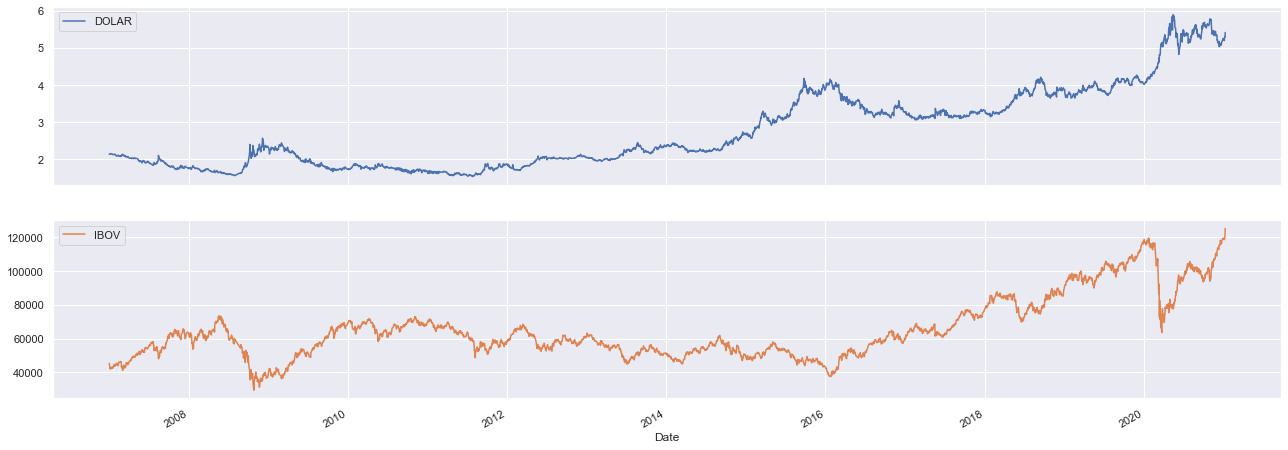

In [7]:
sns.set()
carteira.plot(subplots=True, figsize=(22,8));

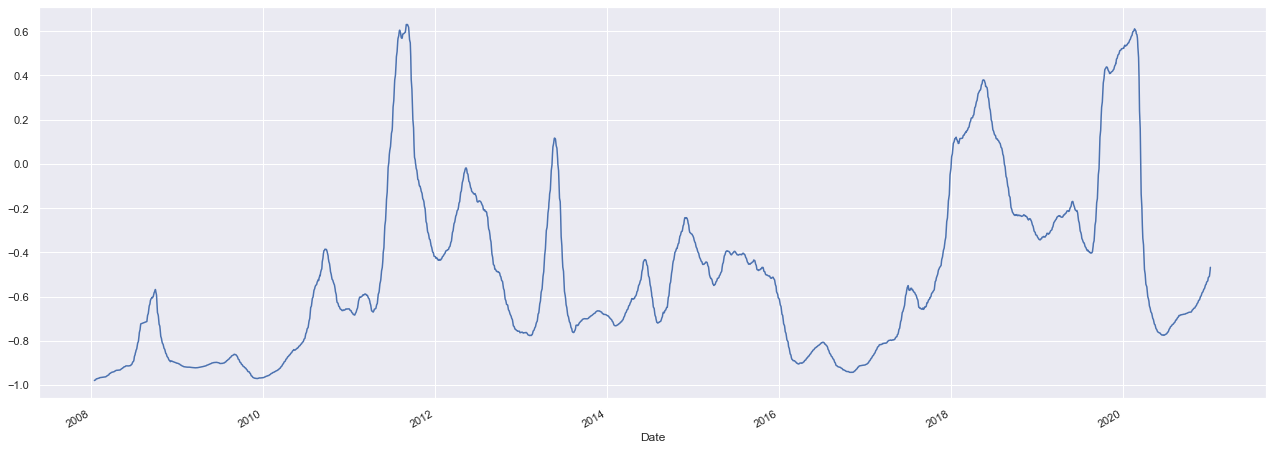

In [8]:
carteira["DOLAR"].rolling(252).corr(carteira["IBOV"]).plot(figsize=(22,8));

É possivel observar que a correlação entre o IBOV e o Dolar varia de acordo com o tempo, descatando que, atualmente (novembro de 2020), os indices apresentam uma correlação inversamente proporcional, ou seja, quando o Dolar aumenta o IBOV cai.

Calcundo a variação dos retornos

In [9]:
retornos = carteira.pct_change()[1:]
retornos

,DOLAR,IBOV
Date,,
2007-01-03,0.001642,-0.020669
2007-01-04,0.002108,-0.009562
2007-01-05,0.003740,-0.040323
2007-01-08,-0.000233,0.013848
2007-01-09,0.001165,-0.019216
...,...,...
2021-01-04,-0.003206,-0.006270
2021-01-05,0.019916,0.005609
2021-01-06,-0.002115,0.005267


In [10]:
retornos.describe()

,DOLAR,IBOV
count,3429.000000,3429.000000
mean,0.000347,0.000462
std,0.012263,0.018182
min,-0.104792,-0.147797
25%,-0.005892,-0.008450
50%,0.000132,0.000714
75%,0.006374,0.009729
max,0.101524,0.146560


Visualizando os dados do retorno

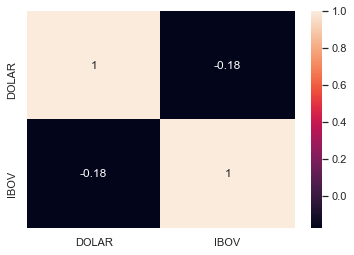

In [11]:
sns.heatmap(retornos.corr(), annot=True);

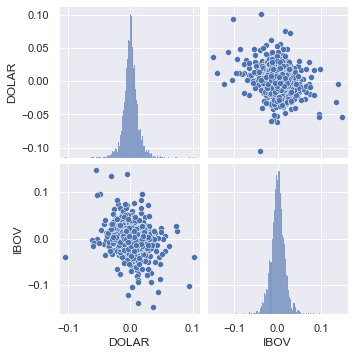

In [12]:
sns.pairplot(retornos);

Visualizando a correlação entre o IBOV e i Dolar de acordo com o retorno

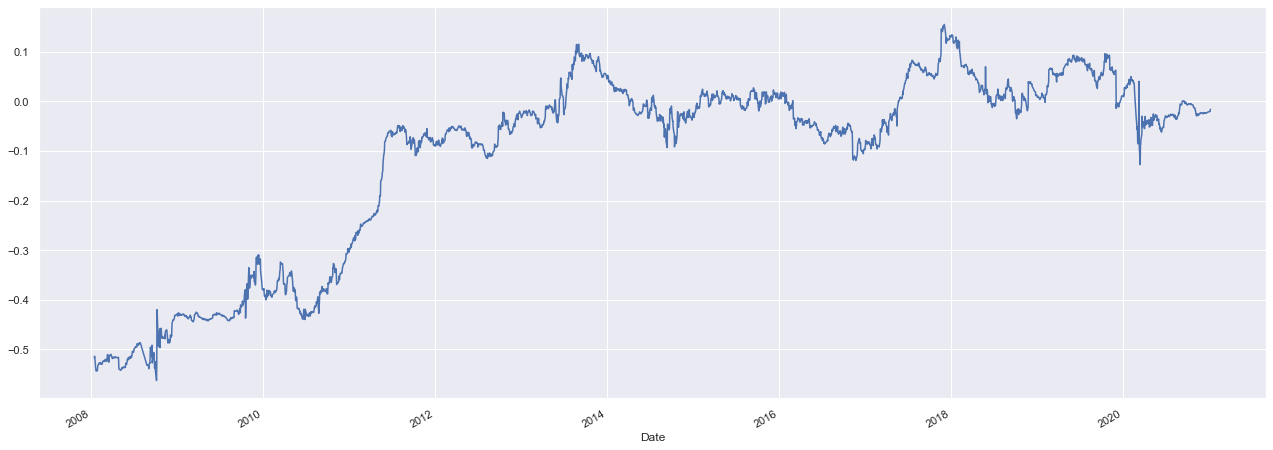

In [13]:
retornos["DOLAR"].rolling(252).corr(retornos["IBOV"]).plot(figsize=(22,8));

## Dolarizando o indice Bovespa

In [14]:
carteira["IBOV_DOLARIZADO"] = (carteira["IBOV"] / carteira["DOLAR"])
carteira

,DOLAR,IBOV,IBOV_DOLARIZADO
Date,,,
2007-01-02,2.1310,45383.0,21296.573959
2007-01-03,2.1345,44445.0,20822.206345
2007-01-04,2.1390,44020.0,20579.710732
2007-01-05,2.1470,42245.0,19676.291819
2007-01-08,2.1465,42830.0,19953.411504
...,...,...,...
2021-01-04,5.1919,118558.0,22835.186561
2021-01-05,5.2953,119223.0,22514.871649
2021-01-06,5.2841,119851.0,22681.440309


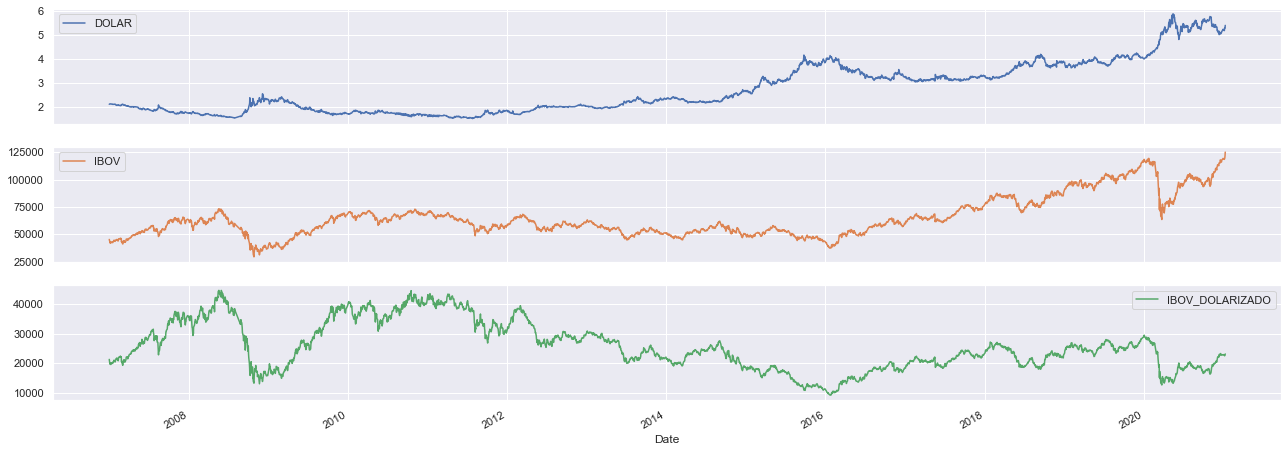

In [15]:
sns.set()
carteira.plot(subplots=True, figsize=(22,8));

Correlação de fato entre o IBOV e o Dolar